# 1️⃣ Introduction

This project explores the factors influencing employee attrition using the IBM HR Analytics Employee Attrition & Performance dataset. The goal is to identify key drivers of attrition and suggest actionable strategies to improve employee retention.

# Conclusion

This analysis highlights the key factors influencing employee attrition and provides data-driven recommendations to support retention strategies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

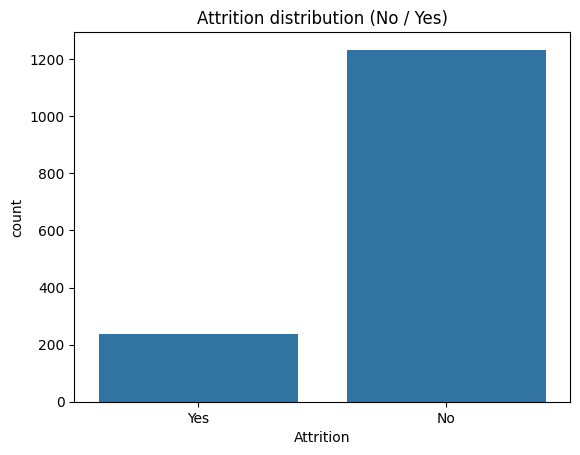

Attrition rate (%):
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [62]:
!pip install pandas matplotlib seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 1. Data research

df.info()

print("\nSummary statistics of all columns:")
df.describe(include='all').transpose()


# Attrition distribution
sns.countplot(x='Attrition', data=df)
plt.title('Attrition distribution (No / Yes)')
plt.show()

# Attrition rate %
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition rate (%):\n", attrition_rate)


# 2️⃣ Exploratory Data Analysis (EDA)

Exploring the dataset to understand class balance, numerical feature distributions, and relationships with Attrition.

The initial analysis of the dataset structure shows that it contains 1470 rows and 35 columns.
There are no missing values in any column, which allows us to proceed directly to data preprocessing without imputation.
The dataset includes both numerical features and categorical variables (such as Gender, JobRole, Department), which were identified and processed accordingly.

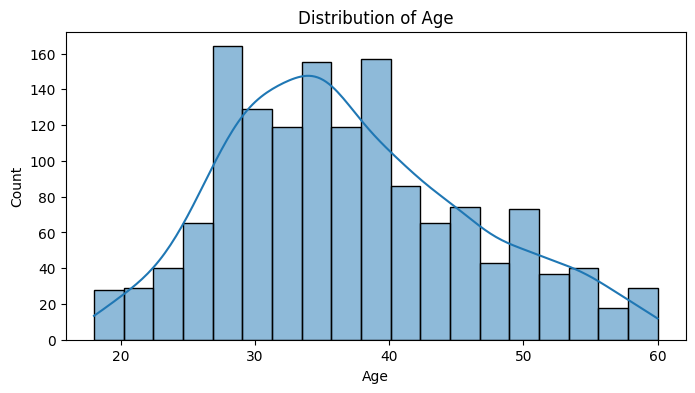

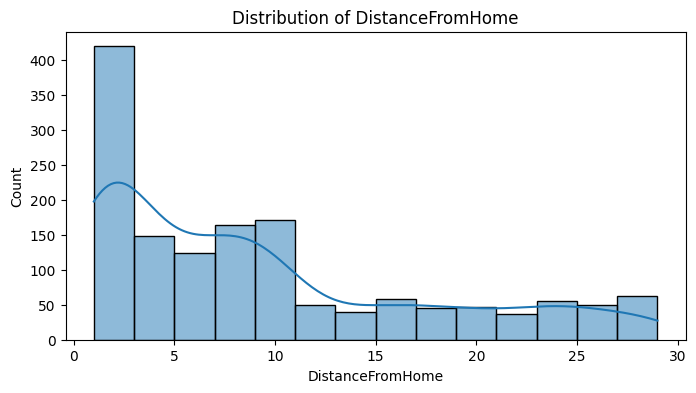

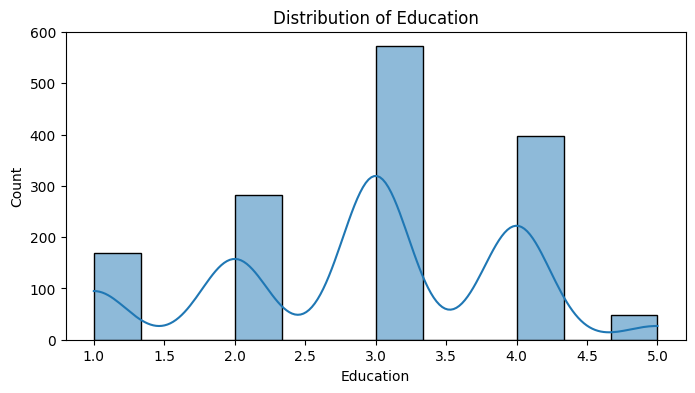

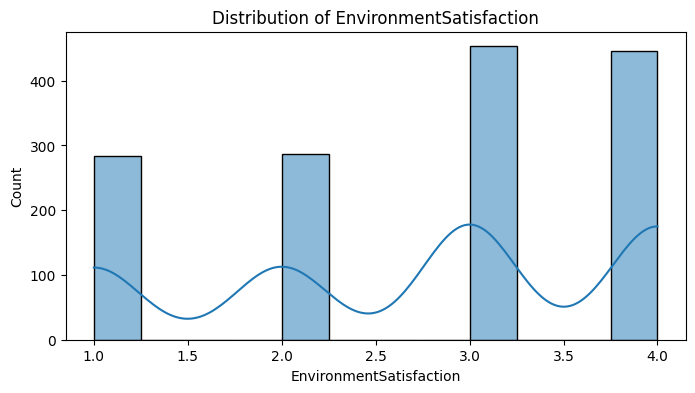

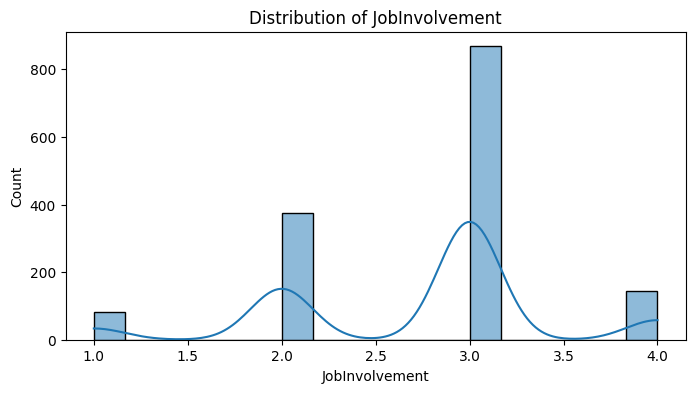

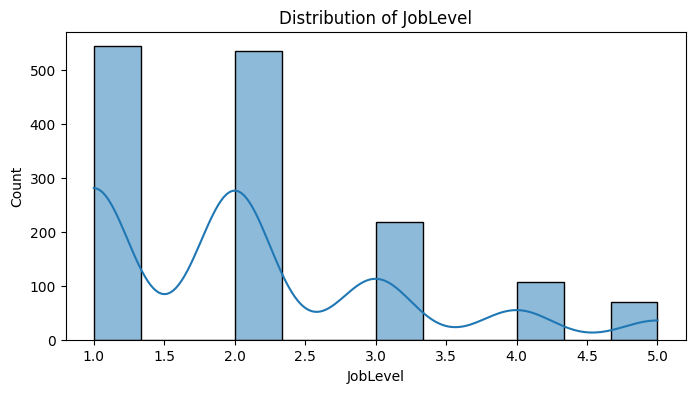

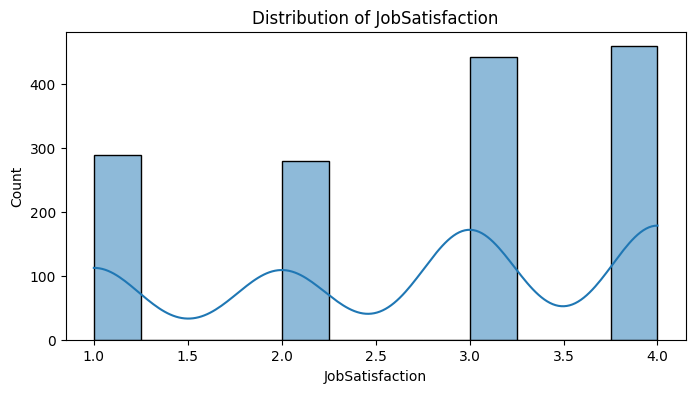

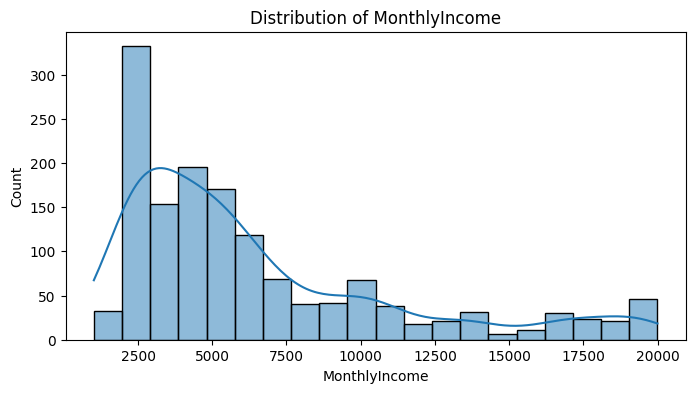

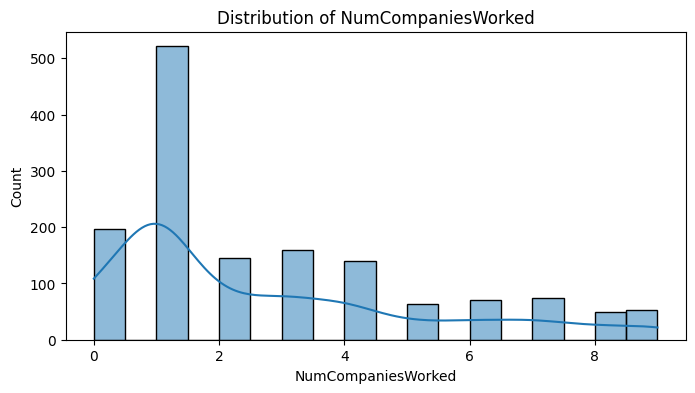

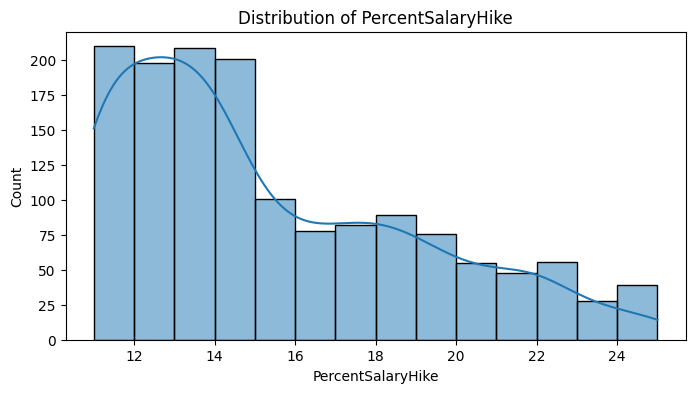

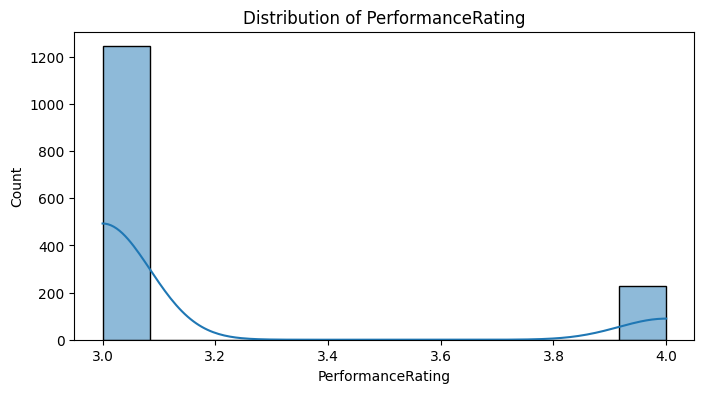

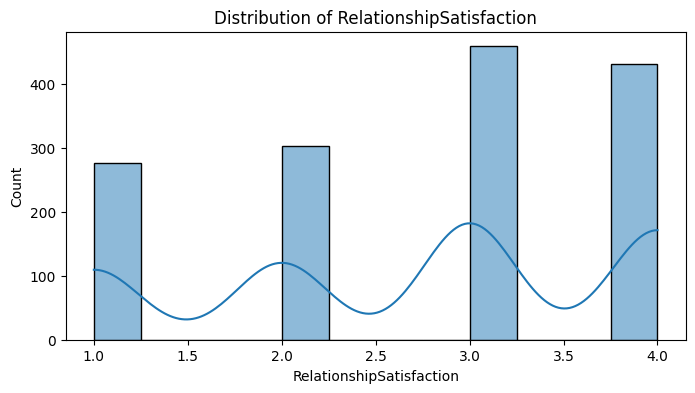

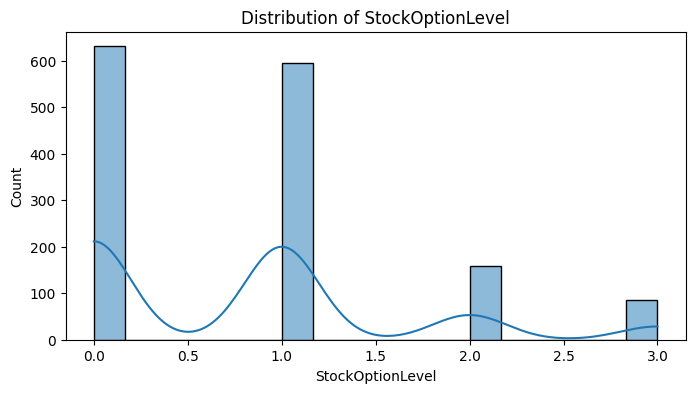

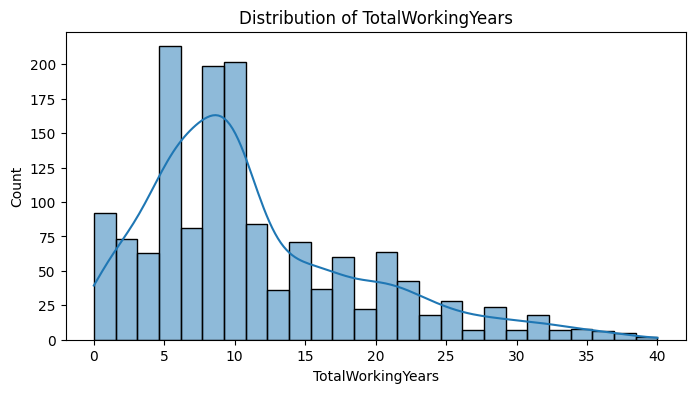

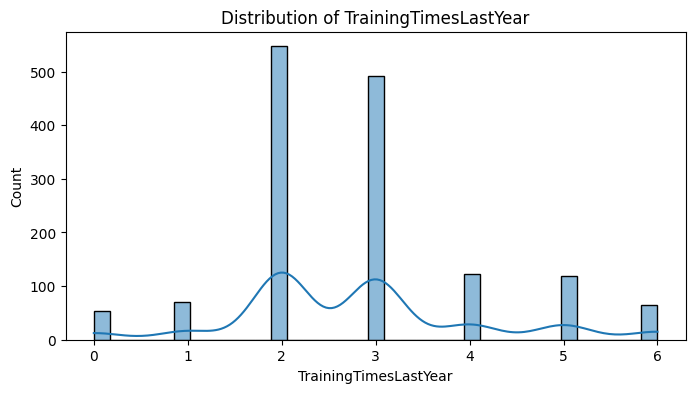

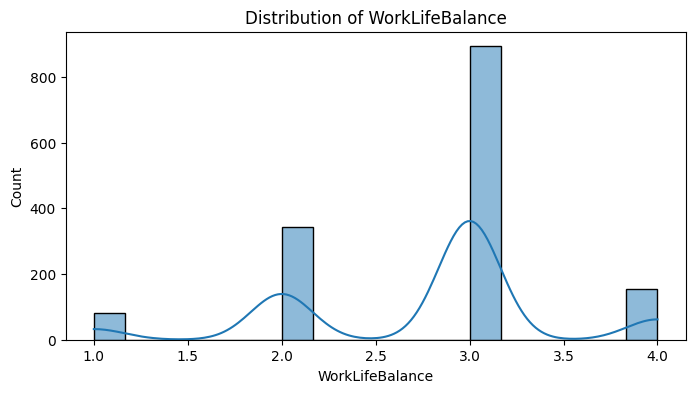

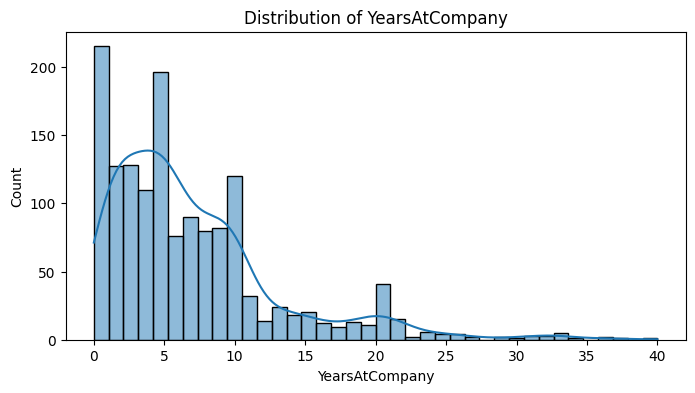

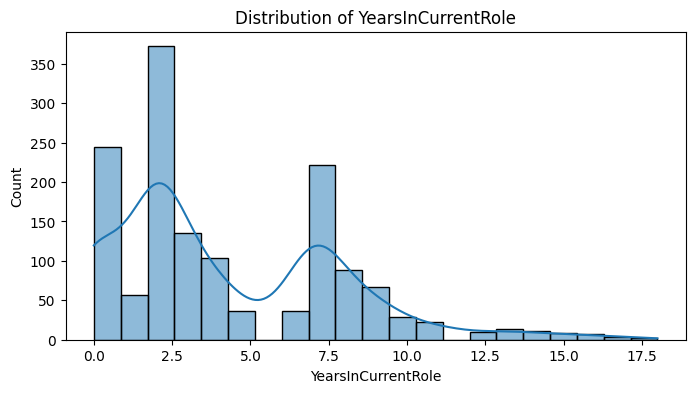

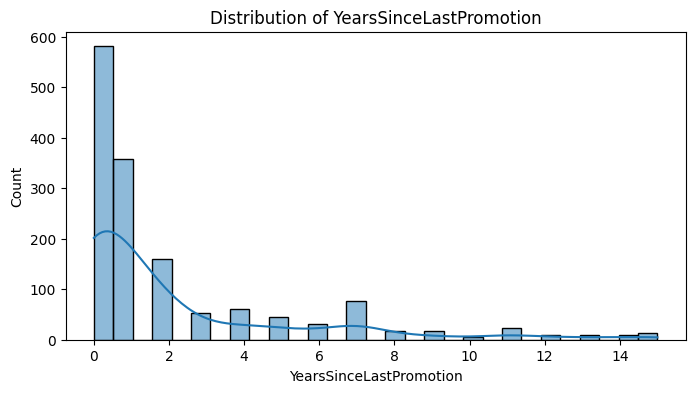

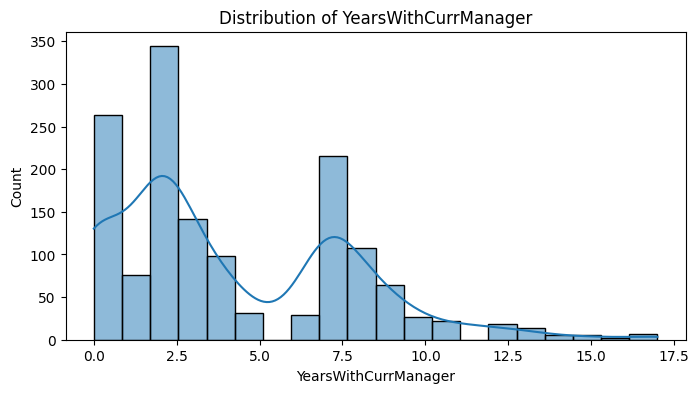

In [63]:
# 2️. Distribution of numerical features
# num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# for col in num_cols:
#     plt.figure(figsize=(8,4))
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

# # 2️⃣ Exploratory Data Analysis (EDA)

import seaborn as sns
# Distribution of numerical features (only informative!)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Non informative features
uninformative_cols = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber',
                      'DailyRate', 'HourlyRate', 'MonthlyRate']

# Informative features
informative_num_cols = [col for col in num_cols if col not in uninformative_cols]

# Plot histograms only for informative numerical features
for col in informative_num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


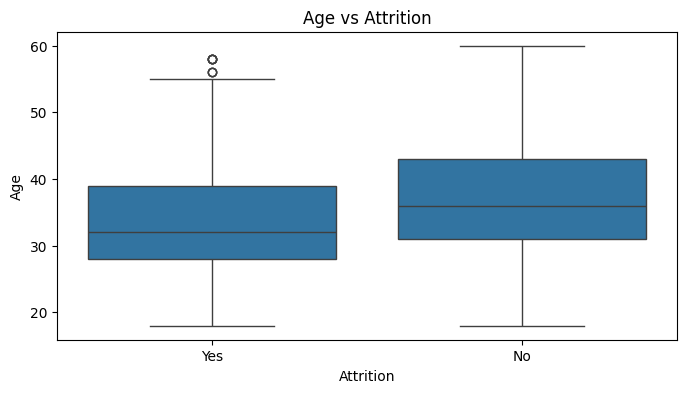

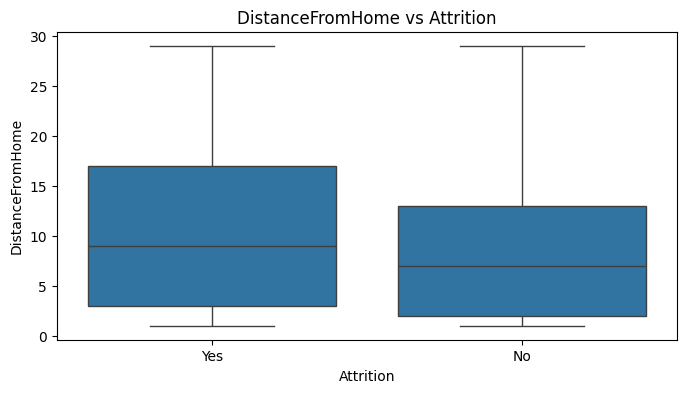

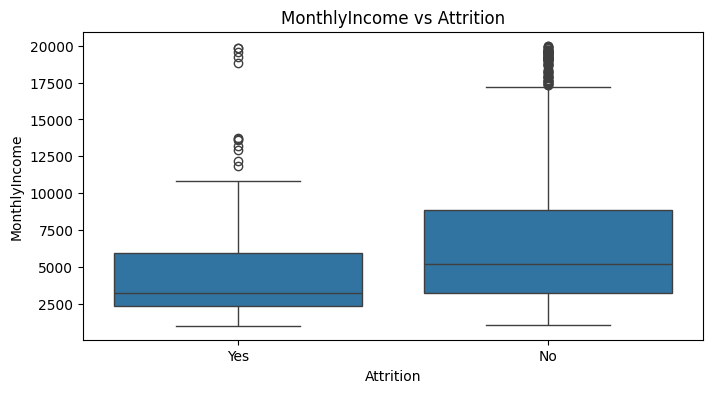

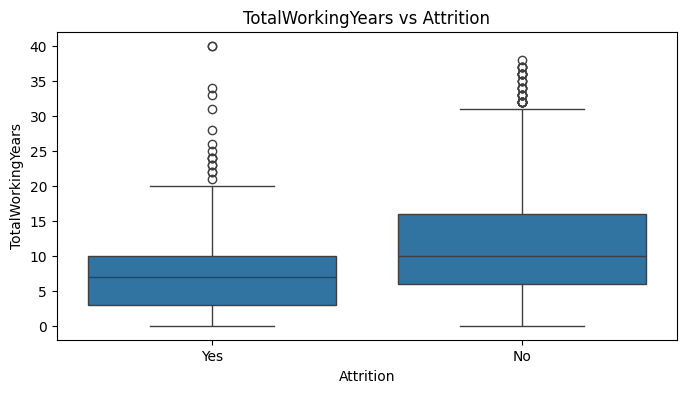

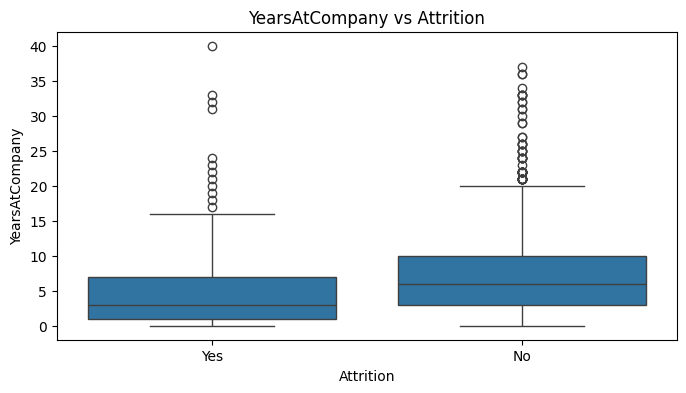

In [64]:
# 3. Boxplots for numerical features vs Attrition
for col in ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} vs Attrition')
    plt.show()



# 3️⃣ Data Preprocessing

Preparing the dataset: encoding categorical variables, normalizing numerical features, and preparing X and y for modeling.

In [65]:
# Data Preprocessing

# Attrition_Flag turn into 0/1
df['Attrition_Flag'] = df['Attrition'].map({'No':0, 'Yes':1})

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Attrition')

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

cols_to_drop = ['Attrition', 'Attrition_Flag', 'EmployeeNumber', 'EmployeeCount', 'StandardHours']
if 'Over18' in df_encoded.columns:
    cols_to_drop.append('Over18')

X = df_encoded.drop(cols_to_drop, axis=1)
y = df_encoded['Attrition_Flag']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1470, 44)
y shape: (1470,)


# 4️⃣ Correlation and Trend Analysis

Analyzing correlations between features and attrition, and exploring trends in performance ratings across roles and departments.

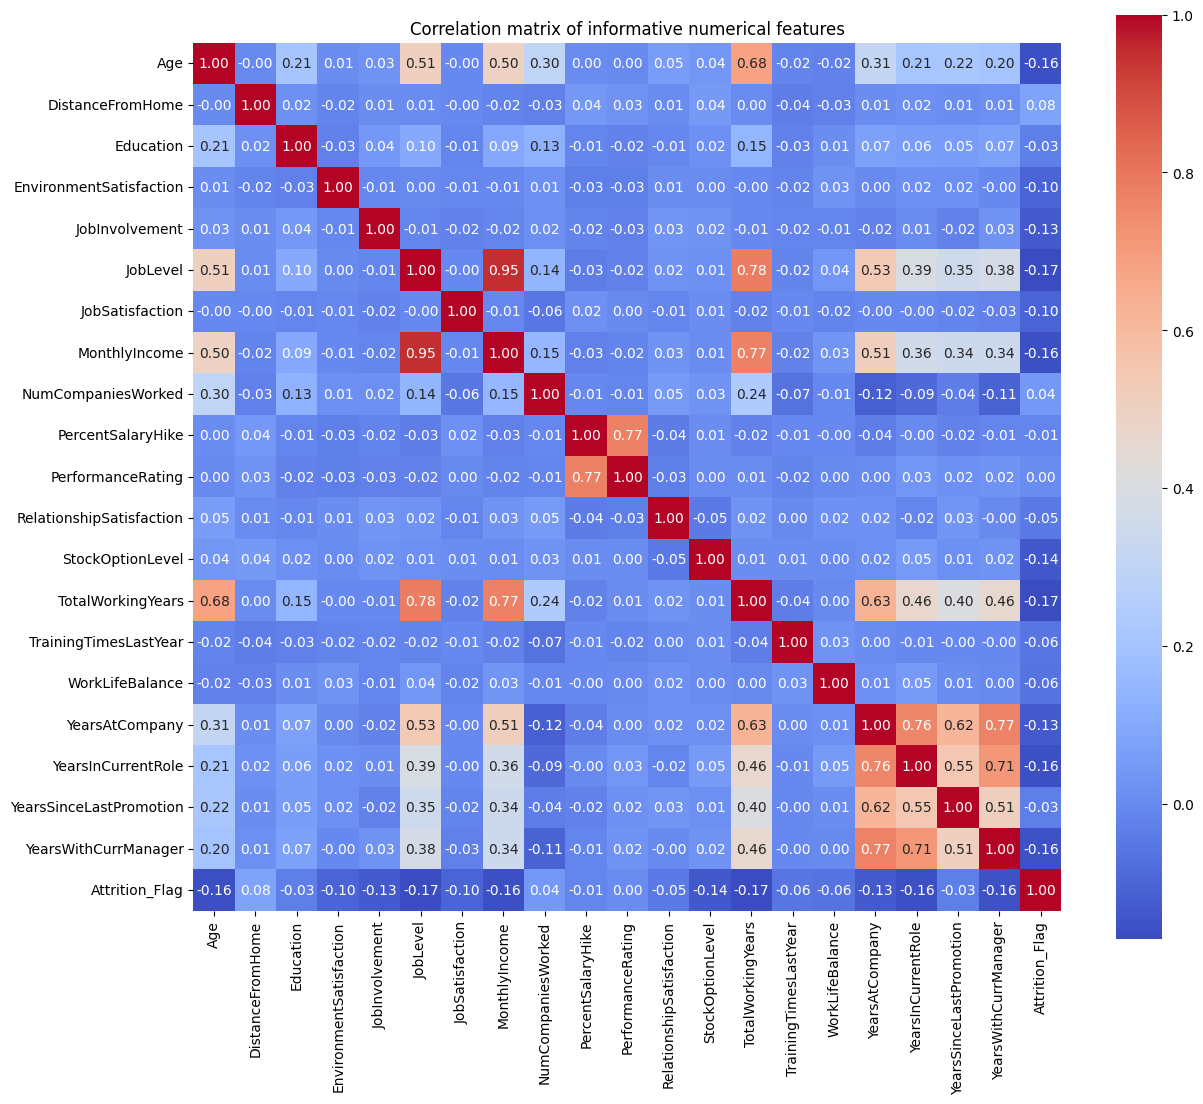

In [66]:
# 4.1 Correlation matrix (clean version)

# Define columns to exclude from correlation matrix (uninformative)
uninformative_cols = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber',
                      'DailyRate', 'HourlyRate', 'MonthlyRate']

# Get all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Filter only informative numerical columns
informative_num_cols = [col for col in num_cols if col not in uninformative_cols]

# Calculate correlation matrix on informative columns
corr = df[informative_num_cols].corr()

# Plot heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Correlation matrix of informative numerical features')
plt.show()




4️⃣ Correlation and Trend Analysis
4.1 Correlation Analysis
In this section, a correlation analysis of the numerical features was performed.

Findings:

Most features show low correlation with the target variable Attrition, which is expected, as employee turnover is usually influenced by a combination of factors.

The features with the highest correlation with Attrition include:
(JobSatisfaction, EnvironmentSatisfaction and WorkLifeBalance).

A moderate correlation was also observed between TotalWorkingYears and YearsAtCompany, which is logical and expected.

Conclusion:

There is no strong linear relationship between any single numerical feature and Attrition.

However, the moderate correlations identified provide useful insights for further analysis.

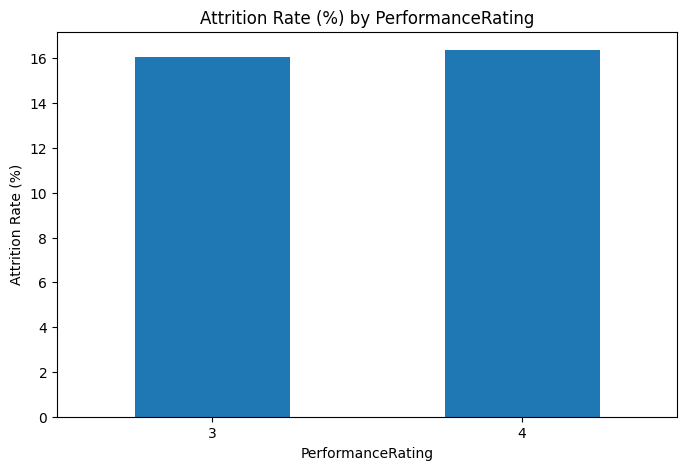

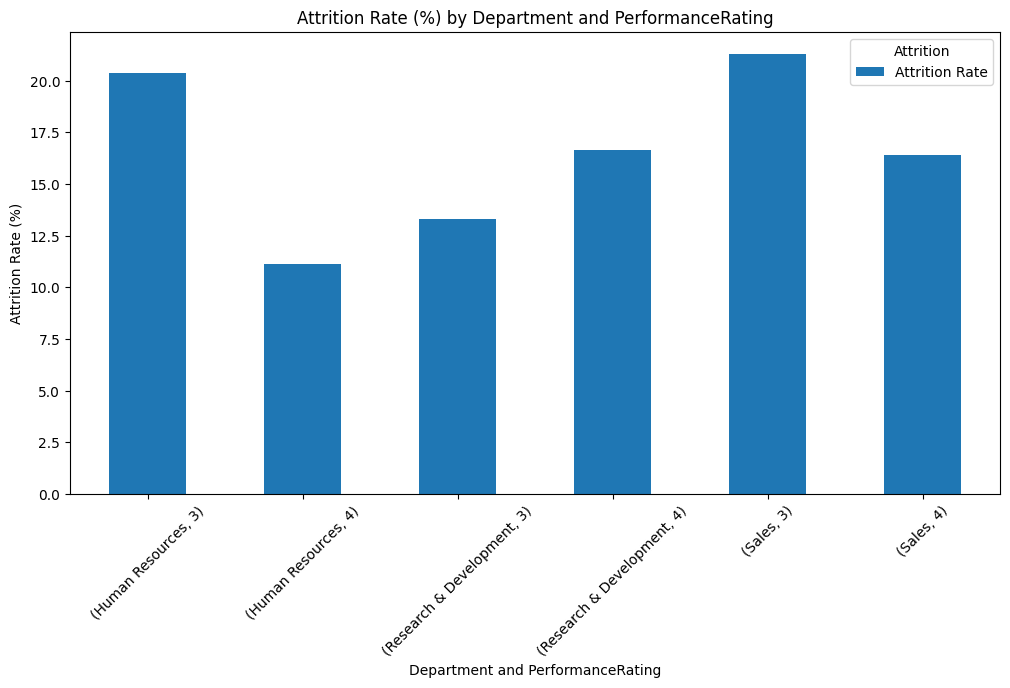

In [67]:
# 4.2 Performance trends

# Attrition rate by PerformanceRating
attrition_perf = df.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True).unstack()[['Yes']]*100

attrition_perf.plot(kind='bar', figsize=(8,5), legend=False)
plt.title('Attrition Rate (%) by PerformanceRating')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('PerformanceRating')
plt.xticks(rotation=0)
plt.show()


# Attrition rate by Department and PerformanceRating
attrition_dept_perf = df.groupby(['Department','PerformanceRating'])['Attrition'].value_counts(normalize=True).unstack()[['Yes']]*100

attrition_dept_perf.plot(kind='bar', figsize=(12,6))
plt.title('Attrition Rate (%) by Department and PerformanceRating')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department and PerformanceRating')
plt.xticks(rotation=45)
plt.legend(title='Attrition', labels=['Attrition Rate'])
plt.show()


4.2 Performance Trends
PerformanceRating by JobRole
Findings:

Most JobRoles show similar distributions of PerformanceRating.

PerformanceRating by Department
Findings:

While analysis of PerformanceRating across JobRole and Department shows limited variability, a deeper look into attrition rates segmented by both Department and PerformanceRating reveals significant differences.


Conclusion:

PerformanceRating appears to be stable across both roles and departments.

Attrition Rate by Department and PerformanceRating — Key Insights:

Attrition is higher for employees with PerformanceRating = 3 across all departments.
The effect is especially strong in Human Resources and Sales.
In R&D, the difference between ratings is smaller but still visible.
Conclusion: Combining Department and PerformanceRating provides valuable insights for targeted retention strategies.



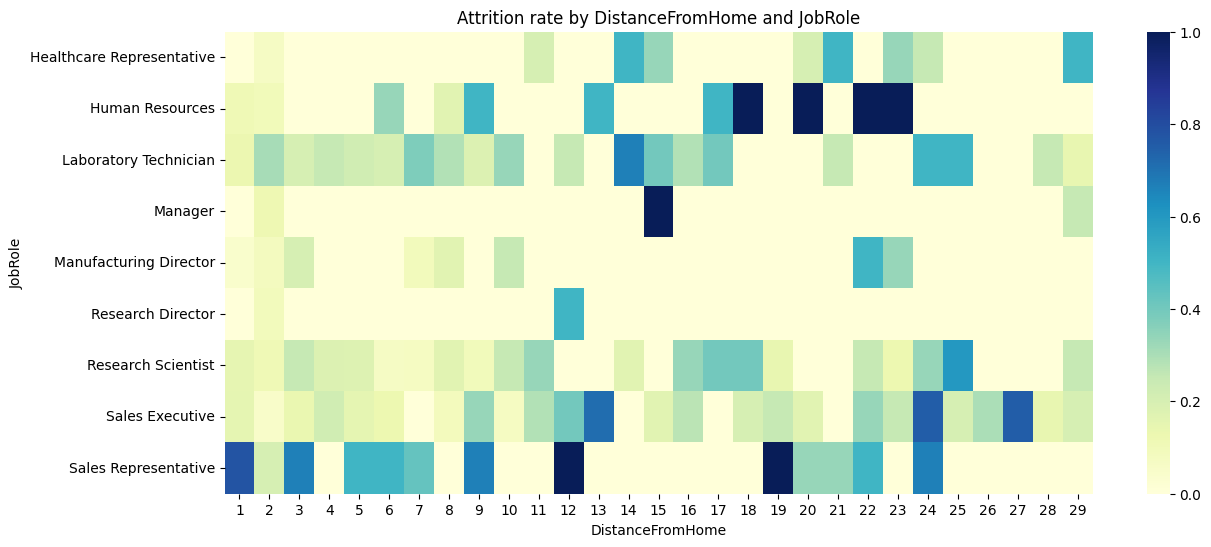

<ipython-input-75-40907b7731ae>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['MonthlyIncome_label', 'Education'])['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()


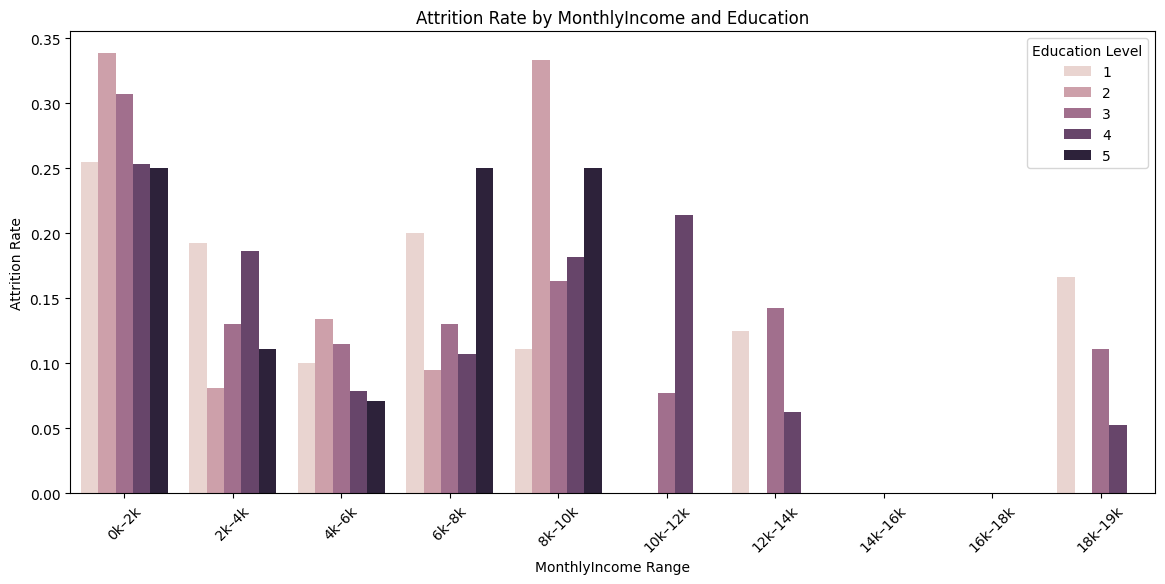

In [75]:
# 4.3 Cross-tabs and heatmaps

# DistanceFromHome by JobRole and Attrition
crosstab_distance_jobrole = pd.crosstab(df['JobRole'], df['DistanceFromHome'], values=df['Attrition_Flag'], aggfunc='mean').fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(crosstab_distance_jobrole, cmap='YlGnBu', annot=False)
plt.title('Attrition rate by DistanceFromHome and JobRole')
plt.xlabel('DistanceFromHome')
plt.ylabel('JobRole')
plt.show()

# MonthlyIncome by Education and Attrition
# Grouping: average Attrition_Flag by Education and binned MonthlyIncome



# # Create a binned variable for MonthlyIncome
df['MonthlyIncome_bin'] = pd.cut(df['MonthlyIncome'], bins=10)

crosstab_income_education = pd.crosstab(df['Education'], df['MonthlyIncome_bin'], values=df['Attrition_Flag'], aggfunc='mean').fillna(0)

# plt.figure(figsize=(14,6))
# sns.heatmap(crosstab_income_education, cmap='YlGnBu', annot=False)
# plt.title('Attrition rate by MonthlyIncome and Education')
# plt.xlabel('MonthlyIncome bins')
# plt.ylabel('Education level')
# plt.show()




# Создаём текстовые метки для интервалов (например: "1k–2k", "2k–3k", ...)
df['MonthlyIncome_bin'] = pd.cut(df['MonthlyIncome'], bins=10)
df['MonthlyIncome_label'] = df['MonthlyIncome_bin'].apply(lambda x: f"{int(x.left/1000)}k–{int(x.right/1000)}k")


# Пересчёт с новыми текстовыми метками
grouped = df.groupby(['MonthlyIncome_label', 'Education'])['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Строим barplot
plt.figure(figsize=(14,6))
sns.barplot(x='MonthlyIncome_label', y='Attrition', hue='Education', data=grouped)
plt.title('Attrition Rate by MonthlyIncome and Education')
plt.ylabel('Attrition Rate')
plt.xlabel('MonthlyIncome Range')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()




4.3 Cross-tabs and Heatmaps
DistanceFromHome by JobRole and Attrition
Findings:

In some roles, an increase in DistanceFromHome correlates with a higher Attrition rate.

This supports the hypothesis that commuting distance may impact an employee’s decision to leave.

MonthlyIncome by Education and Attrition
Findings:

Higher Attrition rates are observed among employees with lower MonthlyIncome and lower Education levels.

As MonthlyIncome increases, the Attrition rate tends to decrease.

Additionally, employees with higher education levels tend to have lower Attrition rates at comparable income levels.

Conclusion:

Financial factors and education level have an impact on employee retention.

These insights can be used to inform compensation policies and retention strategies.



# 5️⃣ Visualization

Key visualizations of the relationships between demographic, satisfaction, and job-related features with attrition.

Summary of Section 4
Employee Attrition is influenced by a wide range of factors — financial, organizational, and personal.

Particular attention should be paid to WorkLifeBalance, employee satisfaction levels, commuting distance, and compensation.

Further analysis of the "at-risk" employee groups identified in the Cross-tabs could provide additional actionable insights.

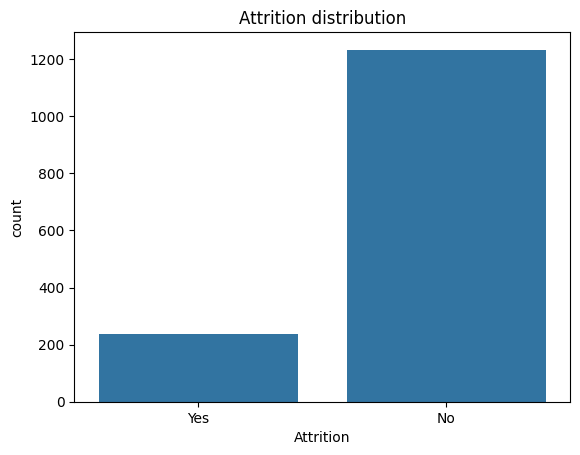

In [72]:
# 5️⃣ Visualization — Graphs for the report

# 5.1 Attrition distribution
sns.countplot(x='Attrition', data=df)
plt.title('Attrition distribution')
plt.show()



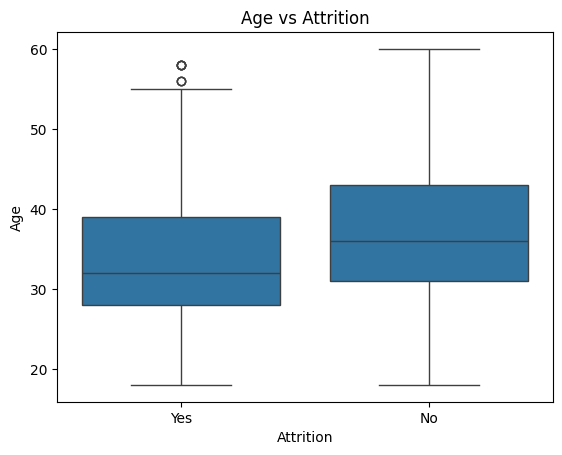

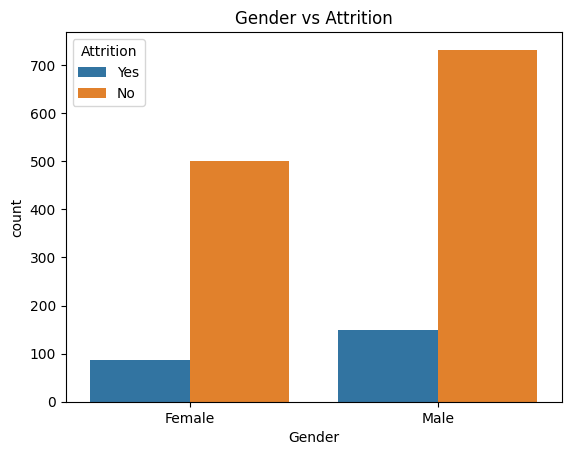

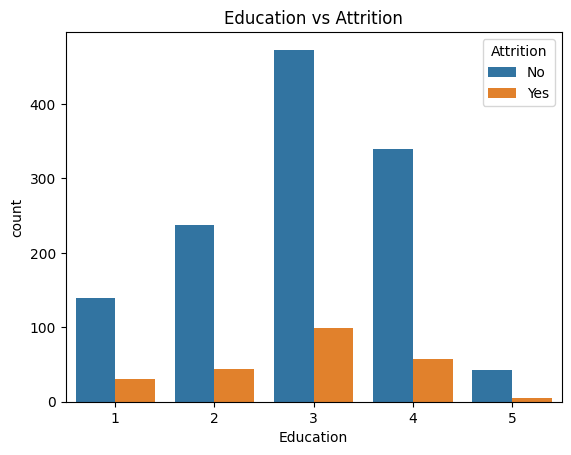

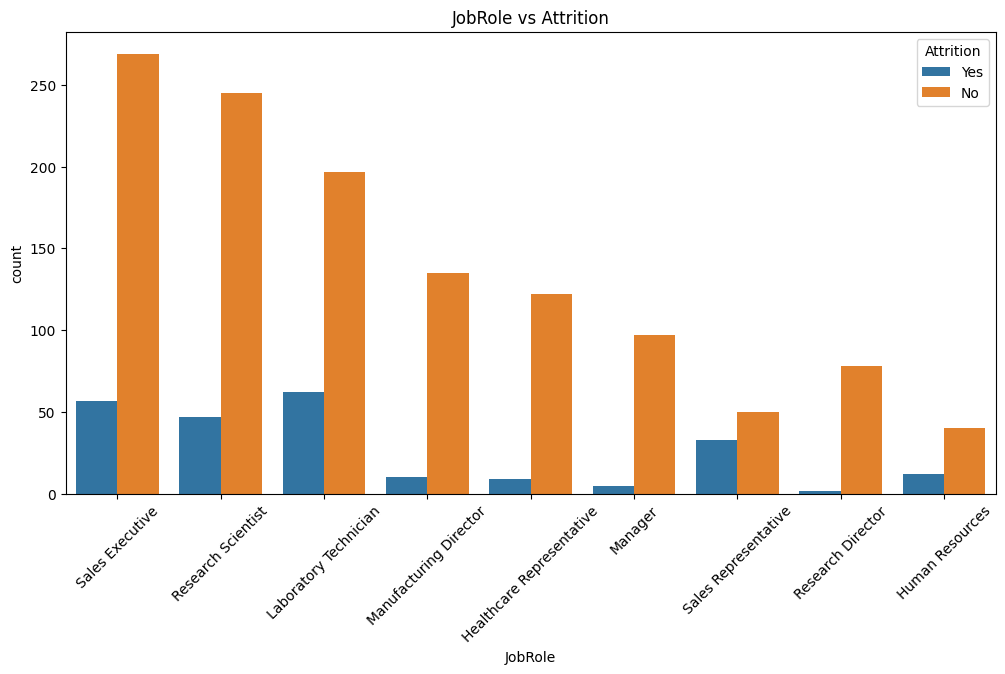

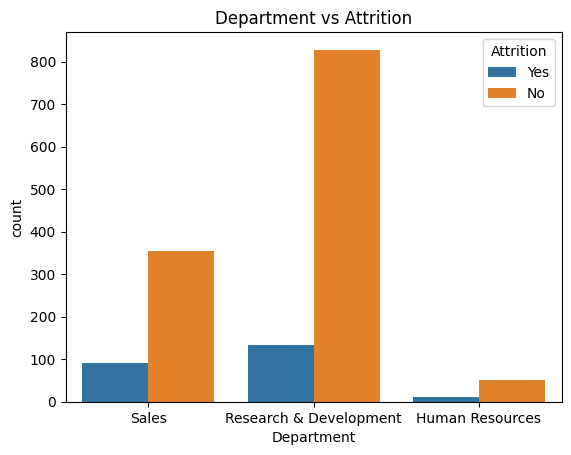

In [73]:
# 5.2 Demographic and job-related variables vs Attrition

# Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')
plt.show()

# Gender vs Attrition
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Gender vs Attrition')
plt.show()

# Education vs Attrition
sns.countplot(x='Education', hue='Attrition', data=df)
plt.title('Education vs Attrition')
plt.show()

# JobRole vs Attrition
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('JobRole vs Attrition')
plt.xticks(rotation=45)
plt.show()

# Department vs Attrition
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Department vs Attrition')
plt.show()



In [ ]:
# 5.3 Satisfaction and WorkLifeBalance vs Attrition

# JobSatisfaction vs Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('JobSatisfaction vs Attrition')
plt.show()

# EnvironmentSatisfaction vs Attrition
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('EnvironmentSatisfaction vs Attrition')
plt.show()

# WorkLifeBalance vs Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('WorkLifeBalance vs Attrition')
plt.show()


# 6️⃣ Retention Strategy Recommendations



Based on the findings from the exploratory data analysis and trend analysis, several actionable recommendations can be proposed to help reduce employee attrition and improve overall employee satisfaction and performance.

6.1 Work-Life Balance
The analysis shows that employees with lower WorkLifeBalance ratings are more likely to leave the company.

Recommendation: Implement flexible work arrangements (remote work options, flexible hours) and promote work-life balance through company policies and programs.

6.2 Employee Satisfaction
Lower levels of JobSatisfaction and EnvironmentSatisfaction correlate with higher attrition rates.

Recommendation: Conduct regular employee satisfaction surveys to monitor key drivers of dissatisfaction.

Address common pain points through targeted initiatives (e.g. improvements to the work environment, team dynamics, recognition programs).

6.3 Compensation and Benefits
Higher attrition rates are observed among employees with lower MonthlyIncome and lower education levels.

Recommendation: Review and adjust compensation structures to ensure competitiveness in the market, especially for roles with higher turnover.

Provide clear communication on career advancement opportunities and salary progression.

6.4 Commute Distance
Attrition tends to increase for employees with longer commutes (higher DistanceFromHome).

Recommendation: Offer flexible work options or consider office location strategies to better accommodate employees with longer commutes.

6.5 Targeted Support for High-Risk Groups
Certain JobRoles and Departments show higher attrition rates.

Recommendation: Conduct focused retention interviews or workshops in these areas to better understand specific challenges and to co-create solutions with employees.

